In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def plot_program_graph(n, program):
    """
    指定した n (または size) と program に対して、対応する CSV ファイルからプロジェクトごとの prover time (s)
    を横軸に、バーグラフで表示する関数です。各バーの上部に数値を表示します。

    Parameters:
        n (int): n または size の値（例: 10, 50, 90）
        program (str): プログラム名（例: "ecdsa", "fib", "sha2", "ethblock"）
    """
    # 固定したプロジェクトの並び順と、各プロジェクトに対応する色
    fixed_order = ["jolt", "risczero", "risczero_gpu", "sp1turbo", "zkm"]
    project_colors = {
        "jolt": "skyblue",
        "risczero": "lightgreen",
        "risczero_gpu": "salmon",
        "sp1turbo": "plum",
        "zkm": "gold"
    }

    # 例: "fib_*.csv" で対象ファイルを取得
    file_list = glob.glob(f"{program}_*.csv")

    # CSV から読み込んだデータをプロジェクトごとに格納（project -> prover time (s)）
    data = {}

    for file in file_list:
        # ファイル名は "<program>_<project>.csv" 形式と仮定
        basename = os.path.splitext(os.path.basename(file))[0]
        # プログラム名とアンダースコアの後ろすべてがプロジェクト名になる
        if basename.startswith(program + '_'):
            project = basename[len(program)+1:]
        else:
            project = basename.split("_")[1]

        df = pd.read_csv(file)

        # 通常のCSVの場合（"n" 列が存在する場合）
        if 'n' in df.columns:
            row = df[df['n'] == n]
            if row.empty:
                continue
            # prover time は ms 単位なので秒に変換
            time_val = row.iloc[0]['prover time (ms)'] / 1000
        # risczero 系の場合（"size" 列が存在する場合）
        elif 'size' in df.columns:
            row = df[df['size'] == n]
            if row.empty:
                continue
            # risczero の場合、prover time は "proof_duration" 列を利用（ここでは proof_duration を ns 単位と仮定して秒に変換）
            time_val = row.iloc[0]['proof_duration'] / 1000 / 1000 / 1000
        else:
            continue

        data[project] = time_val

    if not data:
        print(f"プログラム {program} で n={n} のデータが見つかりませんでした。")
        return

    # 固定の順序に沿って、存在するプロジェクトのみ ordered_* リストに格納
    ordered_projects = []
    ordered_times = []
    ordered_colors = []
    for proj in fixed_order:
        if proj in data:
            ordered_projects.append(proj)
            ordered_times.append(data[proj])
            ordered_colors.append(project_colors.get(proj, "gray"))
    # fixed_order にないプロジェクトがあればアルファベット順で追加
    remaining_projects = sorted([proj for proj in data.keys() if proj not in fixed_order])
    for proj in remaining_projects:
        ordered_projects.append(proj)
        ordered_times.append(data[proj])
        ordered_colors.append("gray")  # デフォルトの色

    # グラフ作成
    plt.figure(figsize=(8, 6))
    bars = plt.bar(ordered_projects, ordered_times, color=ordered_colors)
    plt.title(f"{program} (n={n}) Prover Time")
    plt.xlabel("project")
    plt.ylabel("prover time (s)")
    plt.grid(True, linestyle='--', alpha=0.6)

    # 各バーの上部に値を表示
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.3f}",
            ha='center',
            va='bottom'
        )

    plt.show()


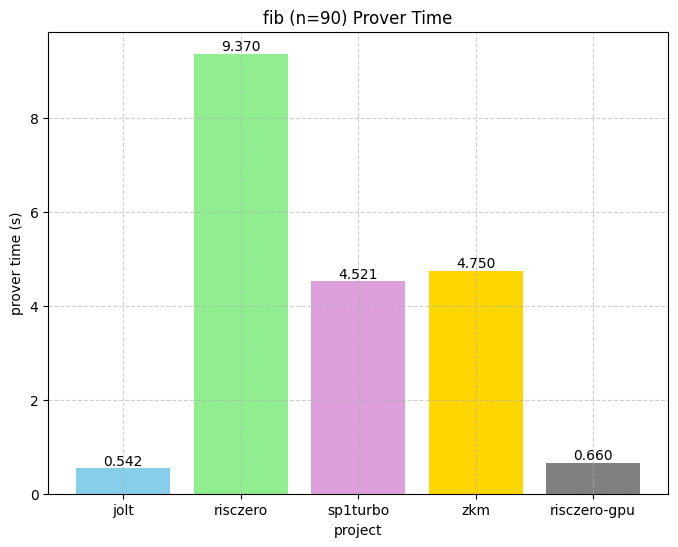

In [29]:
plot_program_graph(90, "fib")

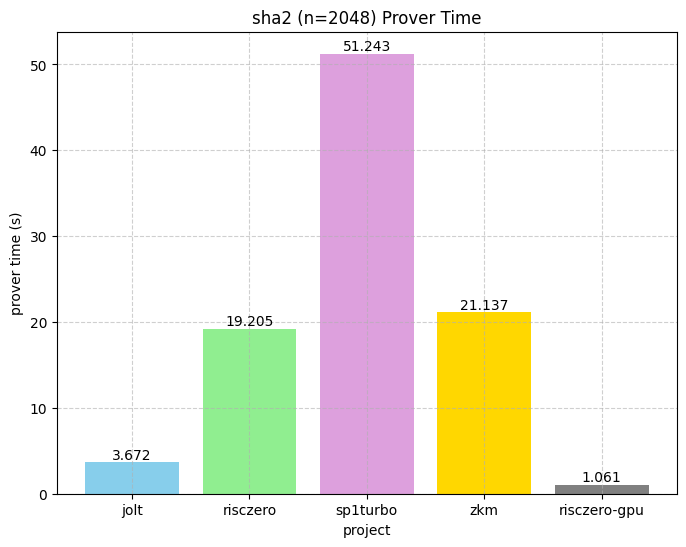

In [30]:
plot_program_graph(2048, "sha2")

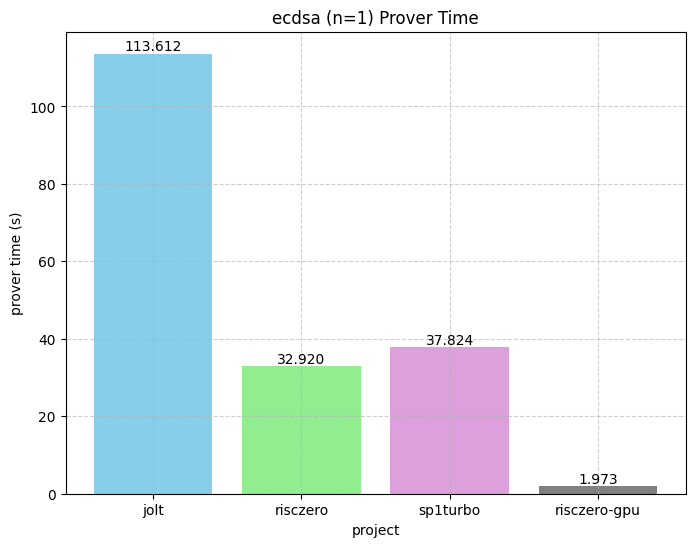

In [31]:
plot_program_graph(1, "ecdsa")

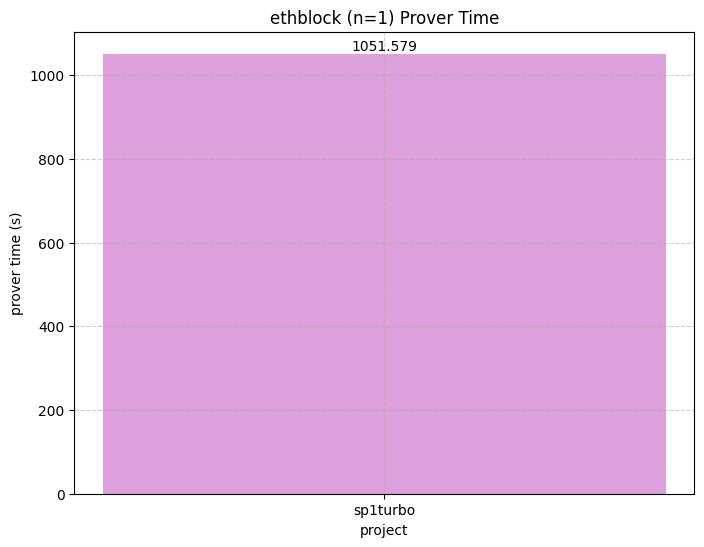

In [32]:
plot_program_graph(1, "ethblock")